# Project 1

## Purpose

I have two goals for this project:

1. Help you learn to compare two different foreign exchange (forex) trading strategies in Python
2. Help you work on a real-world task that an industry partner considers interesting and worthwhile

## Assignment

Our industry partner trades forex for a multinational client.
This client wants our partner to compare its current active trading approach to a new zero-basis banking approach with passive or automatic trading.

***Our assignment:***
Analyze these two approaches, summarize their advantages and disadvantages, and recommend a plan of action for our partner.
Your plan should include an executive summary and supporting figures and tables.
Here are ideas to consider:

1. Our partner provided her thought process in `Student Python Research.docx` and plans to visit one section virtually
2. Consider only the USD/CAD pair
3. ~~Consider all transaction costs~~
    1. ~~Use a variable `spread` to account for transaction costs that increase linearly with trade size (e.g., market orders pay one-half of the bid-ask spread or `0.5 * spread * size`)~~
    2. ~~Use a variable `gamma` to account for transaction costs that increase with trade size *squared* (e.g., large orders have market impacts that increase quickly with size or `gamma * size * size`)~~
    3. ~~Set `spread` and `gamma` to 0.0001 to approximate the real world~~
5. At a minimum, compare the final dollar values with both approaches
6. You might also consider the best final dollar value that an active trader could achieve, *plus any other interesting aspects of these data*
7. Consider all scenarios that our industry partner provides
8. Title, label, and caption your figures and tables and reference them in your report

## Criteria

@tbl-grading-rubric provides the project grading rubric.
The project is worth 200 points.
The peer reviews are worth 100 points, and students will receive their median score.
Almost all students earn perfect peer review scores, so I will factor that into project scores.
For example, a project score *without peer review scores* of $77.5\%$ converts to a project score *with perfect peer review scores* of $85\%$ because $\frac{0.775 \times 200 + 1.00 \times 100}{300} = 0.85 = 85\%$.

| Topic | Points |
|:------|:-------|
| Clarity, correctness, and completeness of calculations          |  60 |
| Clarity, correctness, and completeness of visualizations        |  60 |
| Clarity, correctness, and completeness of discussions           |  60 |
| Correctness of submission according to the deliverables section |  20 |
| Total                                                           | 200 |

: This table provides the project grading rubric  {#tbl-grading-rubric tbl-colwidths="[90,10]"}

## Deliverables

Upload the following as unzipped files to Canvas by 11:59 PM on 2/28:

1. One Jupyter notebook that contains your report and performs *all* your analysis
   1. Name this file `project_1.ipynb` for me to run your code
   2. Your notebook must run on my computer; I will place the data file in the same folder as your notebook
   3. You may not edit the Word documents after you create them
2. One Quarto-generated Word document *without code* for our partner to review
   1. Name this file `project_1_without_code.docx`
   2. Typing `echo: false` in the first cell of this Jupyter notebook hides code in your Word document
3. One Quarto-generated Word document *with code* for me to grade
   1. Name this file `project_1_with_code.docx`
   2. Typing `echo: true` in the first cell of this Jupyter notebook displays code in your Word document

Here is some additional guidance:

1. Provide a one-page executive summary on your first page; this summary can run up to halfway down the second page to avoid having to render your notebook several times to check lengths
2. Your Word document must not exceed 15 pages in length
3. Do not include your names anywhere in your submission

## Data

This project requires two data files.

1. `USDCAD 021345.xlsx` provides recent prices of US dollars in terms of Canadian dollars. For example, $1.3875$ indicates that $1.3875$ Canadian dollars buy $1$ US dollar
2. `NE University Trades.xlsx` provides a summary of our industry partner's trades

We need to install the `openpyxl` package to read these files.
To install it, follow these steps:

1. `conda activate fina6333` (activate your course environment)
2. `conda install openpyxl` (install `openpyxl` into your course environment
3. `jupyter lab` (open JupyterLab to begin your analysis)

We can use `pd.read_excel()` to read these files.
For example, the following code reads the exchange rate file:

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import yfinance as yf

*Edit 2025-02-24:*
I tweaked this code cell to set `Date` as the index and added comments.

In [2]:
df_1 = (
    pd.read_excel(  # Load data from an Excel file into a pandas DataFrame
        io='USDCAD 021325.xlsx',  # Specify the file path or name of the Excel file to read
        sheet_name='Sheet1',  # Select the specific sheet in the Excel file (Sheet1) to load
        names=['Date', 'USDCAD'],  # Assign custom column names 'Date' and 'USDCAD' to the data (overrides any headers in the file)
        parse_dates=['Date'],  # Tell pandas to automatically parse the 'Date' column as datetime objects during loading
    )
    .assign(  # Add or modify columns in the DataFrame
        Date=lambda x: x['Date'].dt.tz_localize('UTC')  # Take the 'Date' column, already a datetime, and assign it the UTC timezone
        # 'x' is the DataFrame; .dt accesses datetime properties; .tz_localize('UTC') makes it timezone-aware as UTC
    )
    .set_index('Date')  # Set the 'Date' column (now UTC timezone-aware) as the DataFrame's index for time-based analysis
)

In [3]:
df_1.head()

,USDCAD
Date,
2024-08-01 17:05:00+00:00,1.3877
2024-08-01 17:10:00+00:00,1.3877
2024-08-01 17:15:00+00:00,1.3875
2024-08-01 17:20:00+00:00,1.3874
2024-08-01 17:25:00+00:00,1.3875


*Edit 2025-02-24:*
I added this code to parse the trades spreadsheet.

In [4]:
df_2 = (
    pd.read_excel(  # Load data from an Excel file into a pandas DataFrame
        io='NE University Trades.xlsx',  # Specify the file path or name of the Excel file
        sheet_name='Sheet1',  # Select the specific sheet in the Excel file to read
        usecols='A:I',  # Read only columns A through I (first 9 columns) to focus on relevant data
        skiprows=2,  # Skip the first 2 rows (e.g., headers or metadata) to get to the actual data
    )
    .assign(  # Add or modify columns in the DataFrame
        Date=lambda x: (  # Create or overwrite the 'Date' column using a lambda function; 'x' represents the DataFrame
            pd.to_datetime(  # Convert a string to a pandas datetime object
                x['Date'].astype(str) + ' ' +  # Convert the 'Date' column to strings and add a space
                x['Time CST'].apply(lambda t: t.strftime('%H:%M:%S'))  # Convert 'Time CST' (Excel time objects) to 'HH:MM:SS' strings
            )  # The result is a combined string like '2025-02-04 15:28:09'
            .dt.tz_localize('America/Chicago')  # Assign the 'America/Chicago' timezone (CST/CDT) to the datetime
            .dt.tz_convert('UTC')  # Convert the timezone-aware datetime from CST/CDT to UTC (e.g., adds 6 hours in winter)
        )  # The 'Date' column now holds UTC timestamps
    )
    .set_index('Date')  # Set the 'Date' column (now in UTC) as the DataFrame's index for time-based operations
    .drop(columns='Time CST')  # Remove the original 'Time CST' column since it’s now part of the 'Date' index
)

In [5]:
df_2

,Interbank Rate,Value Date,Client Rate,Sell CAD,Buy USD,Spread BPS,Spread as %
Date,,,,,,,
2025-02-04 21:28:09+00:00,1.4329,2025-02-05,1.4374,2M,1391420.50,31,0.31
2025-02-12 15:42:37+00:00,1.4295,2025-02-12,1.4341,2M,1394641.79,32,0.32
2025-01-29 14:29:55+00:00,1.4453,2025-01-29,1.4496,1M,689840.72,29,0.29
2025-01-28 16:18:07+00:00,1.4394,2025-01-29,1.4438,1M,692616.71,30,0.30


## Quarto

### Basics

1. Use [Quarto](https://quarto.org/) to generate your Word document from your notebook
2. Use `#` to create a title and `##` to create sections
3. Use `-` or `1.` to create lists
4. Use the first cell in this notebook to hide or display code with `echo=false` or `echo=true`, respectively
5. This first cell must be a `raw` cell instead of a `code` or `markdown` cell
6. Use `quarto render project_1.ipynb` in the same folder as your notebook to render it to a Word document
7. Use the `cd` command in the terminal to change the working directory to the directory with your notebook

### Examples

This section provides a sample analysis highlighting how code and formatting work with Quarto.
@fig-line-plot provides a line plot of the value of a $10,000 investment in SPY, the S&P 500 SPDR ETF.
Note that `#| label:` and `#| fig-cap:` comments at the top of the figure cell create the figure reference/link and the figure caption, respectively.
You can learn more about cross-referencing figures and tables [here](https://quarto.org/docs/authoring/figures.html).

In [6]:
data = (
    yf.download(tickers='SPY', auto_adjust=False, progress=False)
    .assign(
        ret=lambda x: x['Adj Close'].pct_change(),
        value=lambda x: x['ret'].pipe(np.log1p).cumsum().pipe(np.exp).mul(10_000)
    )
)

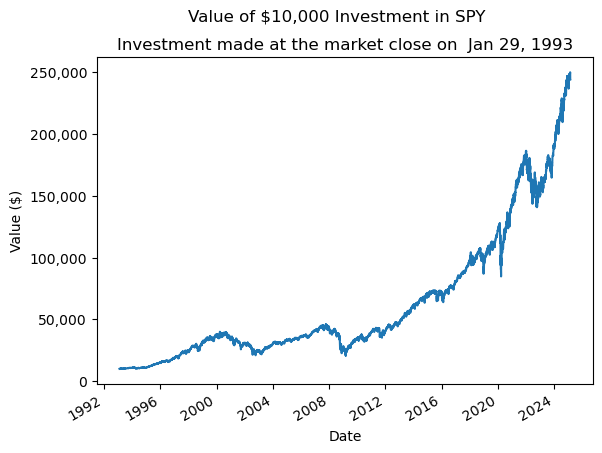

In [7]:
#| label: fig-line-plot
#| fig-cap: "This line plot shows the value of a $10,000 investment in the S&P 500 SPDR ETF at the close of its first day of trading"

data['value'].plot()
plt.ylabel('Value ($)')
plt.suptitle('Value of $10,000 Investment in SPY')
plt.title(f'Investment made at the market close on {data.index[0]: %b %d, %Y}')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

## Artificial Intelligence (AI)

You may use AI (e.g., ChatGPT) to *help* you prepare your analysis and discussion.
However:

1. AI will not do very well on this project without significant input from your team
2. AI will not be a defense against plagiarism because AI should not *write* your code and slides; If you plagiarize an AI that plagiarizes other sources, you are responsible for plagiarizing the AI and its sources